In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm

From Wikipedia:

A '''logistic function''' or '''logistic curve''' is a common S-shaped curve (sigmoid function) with equation

$$f(x) = \frac{L}{1 + e^{-k(x-x_0)}},$$

where
 - $x_0$ = the $x$ value of the sigmoid's midpoint,
 - $L$ = the curve's maximum value,
 - $k$ = the logistic growth rate or steepness of the curve.

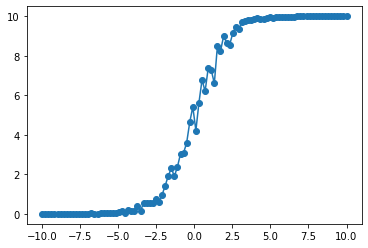

In [2]:
def logistic_function(x, L, k, x_0, sigma=None):
    noise = 0
    if sigma:
        noise = norm(loc = 0, scale=sigma).rvs(len(x))
    return (L / (1 + np.exp(-k * (x + noise - x_0))))

x = np.linspace(-10, 10, 100)
plt.plot(
    x, logistic_function(x, 10, 1, 0, sigma = .3), marker="o"
)

plt.show()

/home/wolle/miniconda3/envs/data_science/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


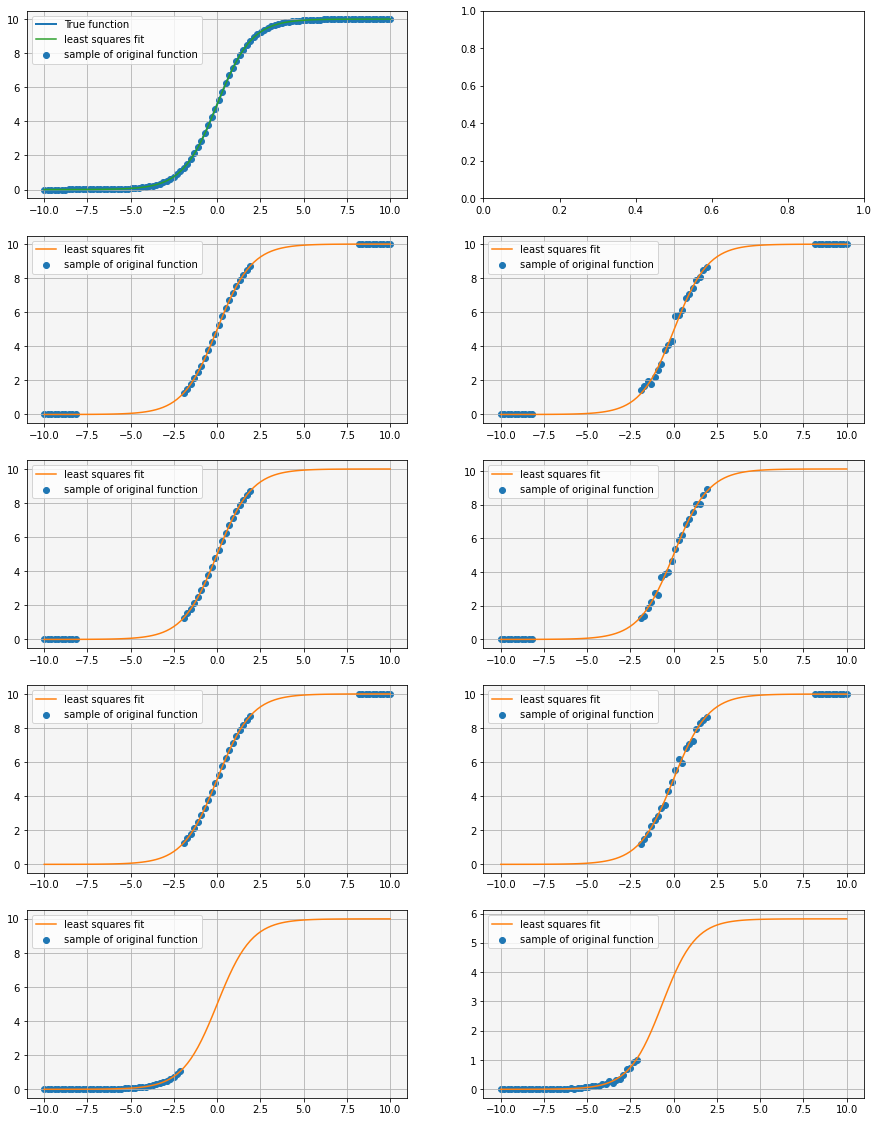

In [35]:
"""Curve fitting via least squares with scipy"""

from scipy.optimize import curve_fit

x = np.linspace(-10, 10, 100)
log_f_params = {"L": 10, "k": 1, "x_0": 0}
sigma_noise = .1

samples = [
    x,
    np.concatenate([x[0:10], x[40:60], x[90:100]]),
    np.concatenate([x[0:10], x[40:60]]),
    np.concatenate([x[40:60], x[90:100]]),
    np.concatenate([x[0:40]]),
]

n_rows = len(samples)
fig, ax = plt.subplots(n_rows, 2, figsize=(15, 4 * (n_rows)))
ax = ax.reshape(-1)

for i, a in enumerate(ax):
    if i == 0:
        y_f = lambda x: logistic_function(x, **log_f_params)
        a.plot(
            x, y_f(x), label="True function", linewidth=2
        )
        
    if i == 1:
        continue
    
    else:
        sigma = None
        x_sample = samples[i // 2]
        
        if i % 2 == 1:
            sigma = sigma
            y_f = lambda x: logistic_function(x, sigma=sigma_noise, **log_f_params)
            y_sample = y_f(x_sample)
        
        else:
            y_f = lambda x: logistic_function(x, **log_f_params)
            y_sample = y_f(x_sample)
        
        # just to create the axis for 2nd plot
        a.plot(x, [0 for a in x], alpha=0)
        
        a.scatter(
            x_sample, y_sample, marker="o", label="sample of original function"
        )
        
        popt, pcov = curve_fit(logistic_function, x_sample, y_sample, p0=[5, 1, 1])
        fit_f = lambda x: logistic_function(x, popt[0], popt[1], popt[2])    

        a.plot(
            x, fit_f(x), label="least squares fit"
        )

    a.legend()
    a.grid(True)
    a.set_facecolor("whitesmoke")

plt.show()